In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
olist = "olist.sqlite"

conn = sqlite3.connect(olist)
cursor = conn.cursor()

In [6]:
cursor.execute(
    '''
        SELECT name
        FROM sqlite_master
        WHERE type = 'table';
    '''
)

tables = cursor.fetchall()

liste = []
print("Les tables de la base olist sont : \n")
for table in tables:
    liste.append(table[0])
    print(f"- {table[0]}")

Les tables de la base olist sont : 

- product_category_name_translation
- sellers
- customers
- geolocation
- order_items
- order_payments
- order_reviews
- orders
- products
- leads_qualified
- leads_closed


In [7]:
for table in liste: 
    cursor.execute(f"PRAGMA table_info({table})")
    tab = cursor.fetchall()
    print(f"\nLes colonnes de la table {table} sont : \n")
    for col in tab:
        print(f"{col}\n")


Les colonnes de la table product_category_name_translation sont : 

(0, 'product_category_name', 'TEXT', 0, None, 0)

(1, 'product_category_name_english', 'TEXT', 0, None, 0)


Les colonnes de la table sellers sont : 

(0, 'seller_id', 'TEXT', 0, None, 0)

(1, 'seller_zip_code_prefix', 'INTEGER', 0, None, 0)

(2, 'seller_city', 'TEXT', 0, None, 0)

(3, 'seller_state', 'TEXT', 0, None, 0)


Les colonnes de la table customers sont : 

(0, 'customer_id', 'TEXT', 0, None, 0)

(1, 'customer_unique_id', 'TEXT', 0, None, 0)

(2, 'customer_zip_code_prefix', 'INTEGER', 0, None, 0)

(3, 'customer_city', 'TEXT', 0, None, 0)

(4, 'customer_state', 'TEXT', 0, None, 0)


Les colonnes de la table geolocation sont : 

(0, 'geolocation_zip_code_prefix', 'INTEGER', 0, None, 0)

(1, 'geolocation_lat', 'REAL', 0, None, 0)

(2, 'geolocation_lng', 'REAL', 0, None, 0)

(3, 'geolocation_city', 'TEXT', 0, None, 0)

(4, 'geolocation_state', 'TEXT', 0, None, 0)


Les colonnes de la table order_items sont : 

(0

In [8]:
query = """
        SELECT    s.seller_city, s.seller_state,
                  oi.order_item_id, oi.price, oi.freight_value, oi.shipping_limit_date,
                  op.payment_sequential, op.payment_type, op.payment_installments, op.payment_value,
                  od.review_score, od.review_creation_date, 
                  o.order_status, o.order_approved_at, o.order_delivered_customer_date, o.order_estimated_delivery_date,
                  cu.customer_city, cu.customer_state,
                  p.product_category_name
        FROM      sellers AS s
        LEFT JOIN order_items AS oi USING(seller_id)
        LEFT JOIN order_payments AS op USING(order_id)
        LEFT JOIN order_reviews AS od USING(order_id)
        LEFT JOIN orders AS o USING(order_id)
        LEFT JOIN customers AS cu USING(customer_id)
        LEFT JOIN products AS p USING(product_id)
      """

cursor.execute(query)
resultat = cursor.fetchall()

In [9]:
db = pd.read_sql(query, conn)

In [10]:
display("La base de données à exploiter est :", db.head(), "Sa forme est : ",db.shape)

'La base de données à exploiter est :'

,seller_city,seller_state,order_item_id,price,freight_value,shipping_limit_date,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_creation_date,order_status,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state,product_category_name
0,campinas,SP,1,106.20,9.56,2017-08-25 20:50:19,1.0,credit_card,2.0,115.76,5.0,2017-08-31 00:00:00,delivered,2017-08-21 20:50:19,2017-08-30 16:07:13,2017-09-01 00:00:00,sao paulo,SP,esporte_lazer
1,campinas,SP,1,101.70,15.92,2017-05-11 16:25:11,1.0,credit_card,2.0,117.62,1.0,2017-06-01 00:00:00,delivered,2017-05-05 16:25:11,2017-06-02 16:57:44,2017-05-30 00:00:00,contagem,MG,esporte_lazer
2,campinas,SP,2,10.80,2.42,2017-09-05 12:50:19,1.0,credit_card,4.0,158.80,3.0,2017-09-02 00:00:00,delivered,2017-08-30 12:50:19,2017-09-01 16:51:26,2017-09-20 00:00:00,maua,SP,esporte_lazer
3,mogi guacu,SP,1,89.99,45.09,2017-11-22 04:30:29,1.0,boleto,1.0,135.08,5.0,2017-11-22 00:00:00,delivered,2017-11-14 04:31:07,2017-11-21 23:26:35,2017-12-04 00:00:00,rio de janeiro,RJ,malas_acessorios
4,mogi guacu,SP,1,199.90,21.89,2017-10-06 02:14:42,1.0,boleto,1.0,221.79,5.0,2017-10-07 00:00:00,delivered,2017-09-30 02:14:42,2017-10-06 17:03:59,2017-11-03 00:00:00,santiago,RS,papelaria


'Sa forme est : '

(118310, 19)

In [11]:
db = db.rename({
                "order_item_id" : "item_id",
                "freight_value" : "transport_value",
                "shipping_limit_date" : "shipping_date",
                "payment_sequential" : "p_sequential",
                "payment_type" : "p_type",
                "payment_installements" : "p_installements",
                "payment_value" : "p_value",
                "review_score" : "r_score",
                "review_creation_date" : "r_creation_date",
                "order_status" : "status",
                "order_approved_at" : "confirmation",
                "order_delivered_customer_date" : "delivered_date",
                "order_estimated_delivery_date" : "estimated_date",
                "product_category_name" : "product_category"
               }, axis = 1)

In [12]:
# db.columns = ["seller_city", "seller_state", "item_id", "price", "transport_value", "shipping_date","p_sequential","p_type", "p_installments", "p_value", "r_score", "r_creation_date", "status", "confirmation", "delivered_date", "estimated_date", "customer_city", "customer_state", "product_category"]

db.head()

,seller_city,seller_state,item_id,price,transport_value,shipping_date,p_sequential,p_type,payment_installments,p_value,r_score,r_creation_date,status,confirmation,delivered_date,estimated_date,customer_city,customer_state,product_category
0,campinas,SP,1,106.20,9.56,2017-08-25 20:50:19,1.0,credit_card,2.0,115.76,5.0,2017-08-31 00:00:00,delivered,2017-08-21 20:50:19,2017-08-30 16:07:13,2017-09-01 00:00:00,sao paulo,SP,esporte_lazer
1,campinas,SP,1,101.70,15.92,2017-05-11 16:25:11,1.0,credit_card,2.0,117.62,1.0,2017-06-01 00:00:00,delivered,2017-05-05 16:25:11,2017-06-02 16:57:44,2017-05-30 00:00:00,contagem,MG,esporte_lazer
2,campinas,SP,2,10.80,2.42,2017-09-05 12:50:19,1.0,credit_card,4.0,158.80,3.0,2017-09-02 00:00:00,delivered,2017-08-30 12:50:19,2017-09-01 16:51:26,2017-09-20 00:00:00,maua,SP,esporte_lazer
3,mogi guacu,SP,1,89.99,45.09,2017-11-22 04:30:29,1.0,boleto,1.0,135.08,5.0,2017-11-22 00:00:00,delivered,2017-11-14 04:31:07,2017-11-21 23:26:35,2017-12-04 00:00:00,rio de janeiro,RJ,malas_acessorios
4,mogi guacu,SP,1,199.90,21.89,2017-10-06 02:14:42,1.0,boleto,1.0,221.79,5.0,2017-10-07 00:00:00,delivered,2017-09-30 02:14:42,2017-10-06 17:03:59,2017-11-03 00:00:00,santiago,RS,papelaria


In [13]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118310 entries, 0 to 118309
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   seller_city           118310 non-null  object 
 1   seller_state          118310 non-null  object 
 2   item_id               118310 non-null  int64  
 3   price                 118310 non-null  float64
 4   transport_value       118310 non-null  float64
 5   shipping_date         118310 non-null  object 
 6   p_sequential          118307 non-null  float64
 7   p_type                118307 non-null  object 
 8   payment_installments  118307 non-null  float64
 9   p_value               118307 non-null  float64
 10  r_score               117332 non-null  float64
 11  r_creation_date       117332 non-null  object 
 12  status                118310 non-null  object 
 13  confirmation          118295 non-null  object 
 14  delivered_date        115722 non-null  object 
 15  

In [14]:
db["item_id"] = db["item_id"].astype(str)

db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118310 entries, 0 to 118309
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   seller_city           118310 non-null  object 
 1   seller_state          118310 non-null  object 
 2   item_id               118310 non-null  object 
 3   price                 118310 non-null  float64
 4   transport_value       118310 non-null  float64
 5   shipping_date         118310 non-null  object 
 6   p_sequential          118307 non-null  float64
 7   p_type                118307 non-null  object 
 8   payment_installments  118307 non-null  float64
 9   p_value               118307 non-null  float64
 10  r_score               117332 non-null  float64
 11  r_creation_date       117332 non-null  object 
 12  status                118310 non-null  object 
 13  confirmation          118295 non-null  object 
 14  delivered_date        115722 non-null  object 
 15  

In [15]:
date = ["shipping_date", "r_creation_date", "confirmation", "delivered_date", "estimated_date"]
db[date] = db[date].apply(lambda x: pd.to_datetime(x.str[:13] if x.dtype == 'object' else x))

db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118310 entries, 0 to 118309
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   seller_city           118310 non-null  object        
 1   seller_state          118310 non-null  object        
 2   item_id               118310 non-null  object        
 3   price                 118310 non-null  float64       
 4   transport_value       118310 non-null  float64       
 5   shipping_date         118310 non-null  datetime64[ns]
 6   p_sequential          118307 non-null  float64       
 7   p_type                118307 non-null  object        
 8   payment_installments  118307 non-null  float64       
 9   p_value               118307 non-null  float64       
 10  r_score               117332 non-null  float64       
 11  r_creation_date       117332 non-null  datetime64[ns]
 12  status                118310 non-null  object        
 13 

In [16]:
db.isnull().sum()

seller_city                0
seller_state               0
item_id                    0
price                      0
transport_value            0
shipping_date              0
p_sequential               3
p_type                     3
payment_installments       3
p_value                    3
r_score                  978
r_creation_date          978
status                     0
confirmation              15
delivered_date          2588
estimated_date             0
customer_city              0
customer_state             0
product_category        1709
dtype: int64

In [17]:
100 * db.isnull().sum()/len(db)

seller_city             0.000000
seller_state            0.000000
item_id                 0.000000
price                   0.000000
transport_value         0.000000
shipping_date           0.000000
p_sequential            0.002536
p_type                  0.002536
payment_installments    0.002536
p_value                 0.002536
r_score                 0.826642
r_creation_date         0.826642
status                  0.000000
confirmation            0.012679
delivered_date          2.187474
estimated_date          0.000000
customer_city           0.000000
customer_state          0.000000
product_category        1.444510
dtype: float64

In [18]:
db = db.dropna()
db.isnull().sum()

seller_city             0
seller_state            0
item_id                 0
price                   0
transport_value         0
shipping_date           0
p_sequential            0
p_type                  0
payment_installments    0
p_value                 0
r_score                 0
r_creation_date         0
status                  0
confirmation            0
delivered_date          0
estimated_date          0
customer_city           0
customer_state          0
product_category        0
dtype: int64

In [78]:
db.describe()

,price,transport_value,p_sequential,payment_installments,p_value,r_score,retard_livraison
count,113218.000000,113218.000000,113218.000000,113218.000000,113218.000000,113218.000000,113218.000000
mean,119.886286,20.002370,1.090807,2.943560,171.593928,4.082381,-12.090595
std,181.206128,15.710791,0.686605,2.779198,264.269867,1.345999,10.090011
min,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000,-147.000000
25%,39.900000,13.080000,1.000000,1.000000,60.850000,4.000000,-17.000000
50%,74.900000,16.320000,1.000000,2.000000,107.985000,5.000000,-13.000000
75%,133.000000,21.190000,1.000000,4.000000,189.160000,5.000000,-7.000000
max,6735.000000,409.680000,26.000000,24.000000,13664.080000,5.000000,188.000000


In [20]:
db.describe(include = "object").T

,count,unique,top,freq
seller_city,113218,587,sao paulo,28212
seller_state,113218,22,SP,80751
item_id,113218,21,1,99193
p_type,113218,4,credit_card,83547
status,113218,2,delivered,113211
customer_city,113218,4071,sao paulo,17872
customer_state,113218,27,SP,47824
product_category,113218,73,cama_mesa_banho,11684


In [21]:
columns_capitalize = ["seller_city", "customer_city"]
db[columns_capitalize] = db[columns_capitalize].apply(lambda x: x.str.title() if x.dtype == 'object' else x)

db.head()

,seller_city,seller_state,item_id,price,transport_value,shipping_date,p_sequential,p_type,payment_installments,p_value,r_score,r_creation_date,status,confirmation,delivered_date,estimated_date,customer_city,customer_state,product_category
0,Campinas,SP,1,106.20,9.56,2017-08-25 20:00:00,1.0,credit_card,2.0,115.76,5.0,2017-08-31,delivered,2017-08-21 20:00:00,2017-08-30 16:00:00,2017-09-01,Sao Paulo,SP,esporte_lazer
1,Campinas,SP,1,101.70,15.92,2017-05-11 16:00:00,1.0,credit_card,2.0,117.62,1.0,2017-06-01,delivered,2017-05-05 16:00:00,2017-06-02 16:00:00,2017-05-30,Contagem,MG,esporte_lazer
2,Campinas,SP,2,10.80,2.42,2017-09-05 12:00:00,1.0,credit_card,4.0,158.80,3.0,2017-09-02,delivered,2017-08-30 12:00:00,2017-09-01 16:00:00,2017-09-20,Maua,SP,esporte_lazer
3,Mogi Guacu,SP,1,89.99,45.09,2017-11-22 04:00:00,1.0,boleto,1.0,135.08,5.0,2017-11-22,delivered,2017-11-14 04:00:00,2017-11-21 23:00:00,2017-12-04,Rio De Janeiro,RJ,malas_acessorios
4,Mogi Guacu,SP,1,199.90,21.89,2017-10-06 02:00:00,1.0,boleto,1.0,221.79,5.0,2017-10-07,delivered,2017-09-30 02:00:00,2017-10-06 17:00:00,2017-11-03,Santiago,RS,papelaria


In [22]:
db = db.set_index("confirmation")

In [23]:
db = db.sort_index()

In [24]:
status_stats = 100 * db["status"].value_counts(normalize = True).round(3)

status_stats

delivered    100.0
canceled       0.0
Name: status, dtype: float64

In [25]:
# Quel est le produit qui a été le plus vendu ?

product_stats = pd.DataFrame(100 * db["product_category"]
                            .value_counts(normalize = True)
                            .round(4)
                            .sort_values(ascending = False))

product_stats

,product_category
cama_mesa_banho,10.32
beleza_saude,8.61
esporte_lazer,7.71
moveis_decoracao,7.56
informatica_acessorios,7.00
...,...
cds_dvds_musicais,0.01
portateis_cozinha_e_preparadores_de_alimentos,0.01
pc_gamer,0.01
fashion_roupa_infanto_juvenil,0.01


In [42]:
# Quel est le total recette par produit ?

db_rec_prod = db.groupby("product_category")["price"].sum()
db_rect_prod = db_rec_prod.to_frame()
db_rect_prod.sort_values(by = "price", ascending = False)[:5]

,price
product_category,
beleza_saude,1267072.48
relogios_presentes,1207355.40
cama_mesa_banho,1081890.33
esporte_lazer,989555.18
informatica_acessorios,922482.79


In [36]:
db_rect_prod_reset = db_rect_prod.reset_index()

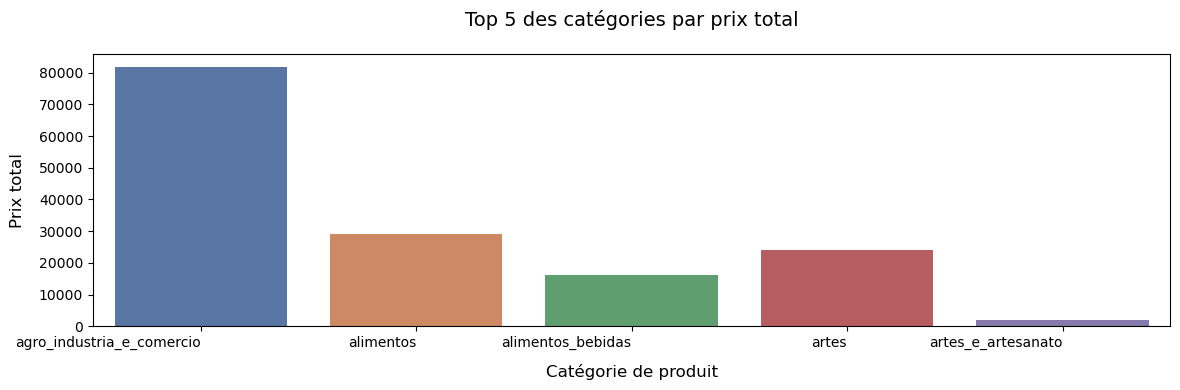

In [48]:
fig, ax = plt.subplots(figsize=(12, 4))

sns.barplot(data=db_rect_prod_reset.head(5), 
            x="product_category",
            y="price",
            palette="deep")
ax.set_xlabel("Catégorie de produit", fontsize=12, labelpad=10)
ax.set_ylabel("Prix total", fontsize=12, labelpad=10)
ax.set_title("Top 5 des catégories par prix total", fontsize=14, pad=20)
plt.xticks(rotation=0, ha='right');

plt.tight_layout() 
plt.show()

In [37]:
price_stats = db.groupby("product_category")["price"].agg(["mean", "sum", "std", "min", "max"])

price_stats

,mean,sum,std,min,max
product_category,,,,,
agro_industria_e_comercio,332.835691,81877.58,397.226748,12.99,2990.00
alimentos,57.769463,29058.04,41.455369,9.99,274.99
alimentos_bebidas,57.686548,16209.92,71.098957,6.50,699.90
artes,117.130390,24011.73,449.923489,5.35,6499.00
artes_e_artesanato,75.583750,1814.01,73.997815,9.80,289.49
...,...,...,...,...,...
sinalizacao_e_seguranca,107.447626,21274.63,125.044052,4.50,740.00
tablets_impressao_imagem,80.239176,6820.33,28.228869,14.90,152.99
telefonia,70.661957,323490.44,133.784502,5.00,2428.00


In [38]:
# Quel est le total recette par date de confirmation (jour), étant donné qu'aucun produit n'a été annulé ?

db_rec_date = db.groupby(db.index.date)["price"].sum()
db_rect_date = db_rec_date.to_frame()
db_rect_date.sort_index()[:5]

,price
2016-10-04,2661.07
2016-10-05,836.68
2016-10-06,14823.23
2016-10-07,8165.30
2016-10-08,5157.83


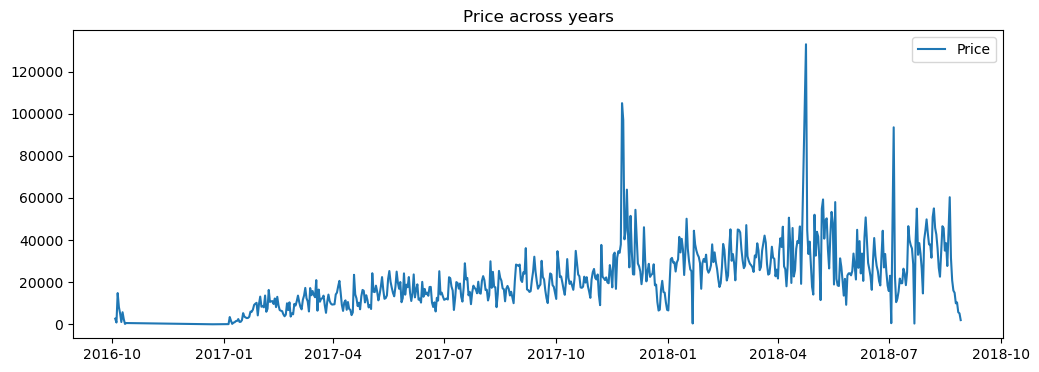

In [168]:
plt.figure(figsize = (12, 4))
plt.plot(db_rect_date, label="Price")
plt.title("Price across years")
#plt.xticks(rotation = 45, size=7)
plt.legend()
plt.show()

In [45]:
# Quel est le total recette par ville (customer_city) ?

db_rec_c_city = db.groupby("customer_city")["price"].sum()
db_rec_c_city = db_rec_c_city.sort_values(ascending = False)
db_rec_c_city.to_frame()[:5]

,price
customer_city,
Sao Paulo,1923666.73
Rio De Janeiro,971338.79
Belo Horizonte,350763.01
Brasilia,304506.88
Curitiba,210820.73


In [44]:
# Quel est le total recette par ville (seller_city) ?

db_rec_city = db.groupby("seller_city")["price"].sum()
db_rec_city = db_rec_city.sort_values(ascending = False)
db_rec_city.to_frame()[:5]

,price
seller_city,
Sao Paulo,2691266.69
Ibitinga,650112.04
Curitiba,474206.36
Rio De Janeiro,338304.21
Guarulhos,281883.18


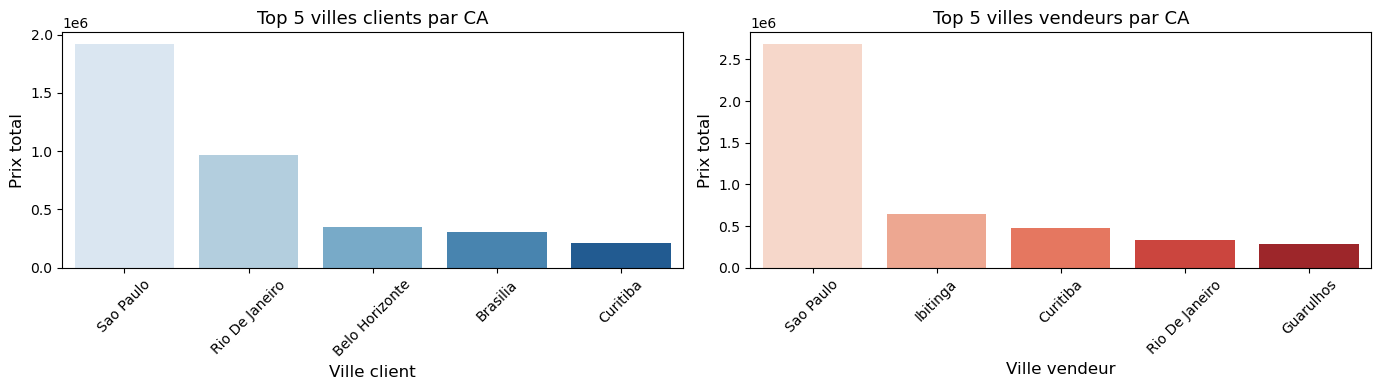

In [49]:
fig, axes = plt.subplots(figsize=(14, 4), ncols=2, nrows=1)

sns.barplot(
    x=db_rec_c_city.index[:5],
    y=db_rec_c_city.values[:5],
    ax=axes[0],
    palette="Blues"
)
axes[0].set_xlabel("Ville client", fontsize=12)
axes[0].set_ylabel("Prix total", fontsize=12)
axes[0].set_title("Top 5 villes clients par CA", fontsize=13)
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(
    x=db_rec_city.index[:5],
    y=db_rec_city.values[:5],
    ax=axes[1], 
    palette="Reds"
)
axes[1].set_xlabel("Ville vendeur", fontsize=12)
axes[1].set_ylabel("Prix total", fontsize=12)
axes[1].set_title("Top 5 villes vendeurs par CA", fontsize=13)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [51]:
# Quel est le nombre de produits vendus par ville (seller_city) ?

db_nbre_s_prod = db.groupby("seller_city")["product_category"].nunique()
db_nbr_s_prod = db_nbre_s_prod.sort_values(ascending = False)
db_nbr_s_prod.to_frame()[:5]

,product_category
seller_city,
Sao Paulo,69
Curitiba,42
Belo Horizonte,40
Rio De Janeiro,40
Guarulhos,39


In [52]:
# Quel est le nombre de produits vendus par ville (customer_city) ?

db_nbre_c_prod = db.groupby("customer_city")["product_category"].nunique()
db_nbr_c_prod = db_nbre_c_prod.sort_values(ascending = False)
db_nbr_c_prod.to_frame()[:5]

,product_category
customer_city,
Sao Paulo,71
Rio De Janeiro,66
Belo Horizonte,64
Brasilia,60
Porto Alegre,59


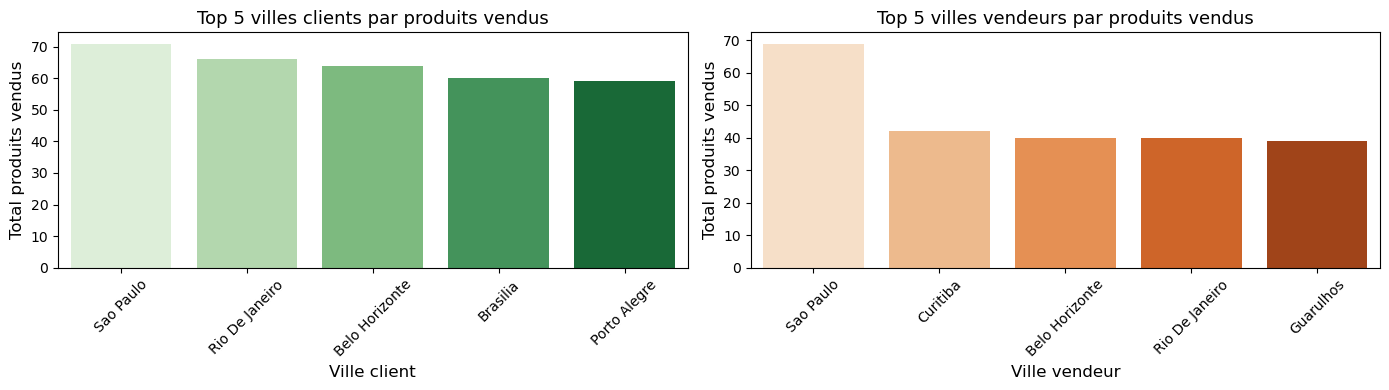

In [56]:
fig, axes = plt.subplots(figsize=(14, 4), ncols=2, nrows=1)

sns.barplot(
    x=db_nbr_c_prod.index[:5],
    y=db_nbr_c_prod.values[:5],
    ax=axes[0],
    palette="Greens"
)
axes[0].set_xlabel("Ville client", fontsize=12)
axes[0].set_ylabel("Total produits vendus", fontsize=12)
axes[0].set_title("Top 5 villes clients par produits vendus", fontsize=13)
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(
    x=db_nbr_s_prod.index[:5],
    y=db_nbr_s_prod.values[:5],
    ax=axes[1], 
    palette="Oranges"
)
axes[1].set_xlabel("Ville vendeur", fontsize=12)
axes[1].set_ylabel("Total produits vendus", fontsize=12)
axes[1].set_title("Top 5 villes vendeurs par produits vendus", fontsize=13)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [134]:
# quel produit a été le plus vendu, dans quel ville/ pays a il été vendu et quel est son score
# quels sont les top 3 des produits les plus vendu par ville/ pay
# a t il eu des livraisons qui ont exécedé la date de livraison estimée
# quel produit par pays a re

In [57]:
# Quel est le nombre de livraison qui a excédé la date de livraison estimée ? 

db['retard_livraison'] = (db['delivered_date'] - db['estimated_date']).dt.days
nb_retards = (db['retard_livraison'] > 0).sum()

nb_retards

7248

In [80]:
db['late'] = db['retard_livraison'].apply(lambda x: "Yes" if x < 0 else "No")

In [69]:
# Quel est le nombre de livraison en retard par ville (customer_city) ?

db_nbre_late = db[db['late'] == 'Yes'].groupby('customer_city').size()
db_nbr_late = db_nbre_late.sort_values(ascending = False)
db_nbr_late.to_frame(name='Late_deliveries')[:5]

,Late_deliveries
customer_city,
Sao Paulo,16800
Rio De Janeiro,6919
Belo Horizonte,2950
Brasilia,2204
Curitiba,1684


In [77]:
db.head()

,seller_city,seller_state,item_id,price,transport_value,shipping_date,p_sequential,p_type,payment_installments,p_value,r_score,r_creation_date,status,delivered_date,estimated_date,customer_city,customer_state,product_category,retard_livraison,late
confirmation,,,,,,,,,,,,,,,,,,,,
2016-10-04 09:00:00,Ribeirao Preto,SP,1,32.49,11.74,2016-10-21 16:00:00,1.0,credit_card,2.0,44.23,5.0,2016-10-26,delivered,2016-10-24 16:00:00,2016-11-24,Sao Paulo,SP,consoles_games,-31,Yes
2016-10-04 10:00:00,Ibitinga,SP,1,119.90,13.56,2016-10-21 16:00:00,1.0,credit_card,6.0,133.46,1.0,2016-11-01,delivered,2016-10-31 11:00:00,2016-11-23,Hortolandia,SP,moveis_decoracao,-23,Yes
2016-10-04 10:00:00,Sao Paulo,SP,1,89.90,24.87,2016-10-21 16:00:00,1.0,credit_card,1.0,114.77,1.0,2016-11-19,delivered,2016-11-18 08:00:00,2016-11-24,Sao Paulo,SP,utilidades_domesticas,-6,Yes
2016-10-04 10:00:00,Ibitinga,SP,1,74.90,17.37,2016-10-21 16:00:00,1.0,credit_card,3.0,92.27,1.0,2016-11-02,delivered,2016-11-01 15:00:00,2016-11-25,Ipatinga,MG,moveis_decoracao,-24,Yes
2016-10-04 10:00:00,Sao Paulo,SP,1,189.00,48.45,2016-10-08 10:00:00,1.0,credit_card,4.0,237.45,5.0,2016-11-08,delivered,2016-11-08 10:00:00,2016-12-08,Ananindeua,PA,moveis_decoracao,-30,Yes
